In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gs = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Feature Engineering**

<AxesSubplot:>

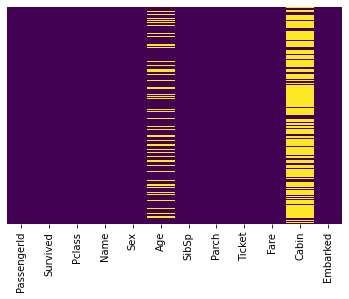

In [5]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

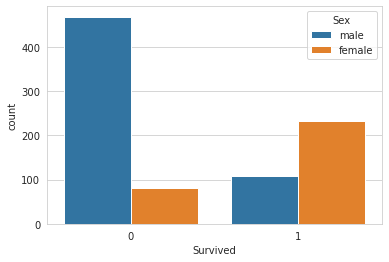

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

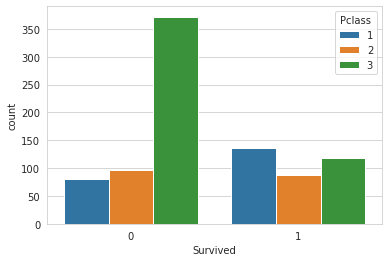

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train)

In [8]:
train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
tm = train.groupby("Survived").mean()
tm

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [10]:
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

PassengerId    0.002971
Pclass         0.129755
Age            0.038706
SibSp          0.077914
Parch          0.170176
Fare           0.372661
dtype: float64

In [11]:
# print(train["Name"].head())

# def get_title(name):
#     if '.' in name:
#         return name.split(',')[1].split('.')[0].strip()
#     else:
#         return 'Unknown'

# def title_map(title):
#     if title in ['Mr']:
#         return 1
#     elif title in ['Master']:
#         return 3
#     elif title in ['Ms', 'Mlle', 'Miss']:
#         return 4
#     elif title in ['Mme', 'Mrs']:
#         return 5
#     else:
#         return 2
    
# train['title'] = train['Name'].apply(get_title).apply(title_map)
# test['title'] = test['Name'].apply(get_title).apply(title_map)

train['title']  =train.Name.str.split(', ').str[1].str.split('. ').str[0]
train['title'].value_counts()

train.loc[train.title.eq('Mrs'), 'title'] = 'Mrs'
train.loc[train.title.eq('Mr'), 'title'] = 'Mr'

train.loc[train.title.isin(['Miss','Ms']),'title'] = 'Miss'
train.loc[train.title.eq('Master'),'title'] = 'Master'

train.loc[~train.title.isin(['Mrs','Mr','Miss','Master']),'title'] = 'Celeb'

In [12]:
test['title']  =test.Name.str.split(', ').str[1].str.split('. ').str[0]
test['title'].value_counts()

test.loc[test.title.eq('Mrs'), 'title'] = 'Mrs'
test.loc[test.title.eq('Mr'), 'title'] = 'Mr'

test.loc[test.title.isin(['Miss','Ms']),'title'] = 'Miss'
test.loc[test.title.eq('Master'),'title'] = 'Master'

test.loc[~test.title.isin(['Mrs','Mr','Miss','Master']),'title'] = 'Celeb'

In [13]:
train = train.drop(["PassengerId", "Name"], axis = "columns")
train.info()
test = test.drop(["PassengerId", "Name"], axis = "columns")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  title     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-nu

In [14]:
train["Sex"] = train["Sex"].replace(["male", "female"], [0, 1])
train.info()
test["Sex"] = test["Sex"].replace(["male", "female"], [0, 1])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  title     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-nu

In [15]:
# train["Cabin"] = train["Cabin"].isna()
# train.info()
# test["Cabin"] = test["Cabin"].isna()
# test.info()

In [16]:
def dum(df,x):
    dum1 = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df,dum1],axis=1)
    df.drop(x,axis=1,inplace=True)
    return df

for i in ['Embarked','title']:
    train = dum(train ,i)
for i in ['Embarked','title']:
    test = dum(test ,i)

In [17]:
# mean_f = train['Fare'].mean()
# train['Fare'] = train['Fare']>mean_f

# train.loc[train['Fare']<=8, 'Fare'] = 0
# train.loc[(train['Fare']>8) & (train['Fare']<=14), 'Fare'] = 1
# train.loc[(train['Fare']>14) & (train['Fare']<=31), 'Fare'] = 2
# train.loc[train['Fare']>31, 'Fare'] = 3

# train['Fare'] = train['Fare'].astype(int)

# test.loc[test['Fare']<=8, 'Fare'] = 0
# test.loc[(test['Fare']>8) & (test['Fare']<=14), 'Fare'] = 1
# test.loc[(test['Fare']>14) & (test['Fare']<=31), 'Fare'] = 2
# test.loc[test['Fare']>31, 'Fare'] = 3
# test['Fare'][test['Fare'].isna()] = 0
# test['Fare'] = test['Fare'].astype(int)

# test['Fare']

In [18]:
tm = train.groupby("Survived").mean()
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

Pclass    0.129755
Sex       0.643977
Age       0.038706
SibSp     0.077914
Parch     0.170176
Fare      0.372661
Q         0.012168
S         0.101449
Master    0.369449
Miss      0.577692
Mr        0.540564
Mrs       0.718799
dtype: float64

In [19]:
# train["Age"][train["Age"].isna()] = train["Age"].mean()

# train["Age"][train["title"]==1] = 32
# train["Age"][train["title"]==2] = 45
train["Age"][train["Master"]==1] = 5
# train["Age"][train["title"]==4] = 22
# train["Age"][train["title"]==5] = 36

mean_age = train.Age.mean()
train.Age = train.Age.fillna(mean_age)

#train = train.drop(["title"], axis = "columns")

test["Age"][test["Master"]==1] = 6
mean_age = test.Age.mean()
test.Age = test.Age.fillna(mean_age)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# def WCG(df):
#     wcg = []
    
#     for i in df["Sex"]:
#         if i==0:
#             wcg.append(0)
#         elif i==1 & df["Age"]>14.0:
#             sibsp.append(1)
        
#     df["WCG"] = sibsp

# WCG(train)
train["WCG"]=np.zeros(891)
train["WCG"][(train["Age"]<=14.0) & (train["Sex"]==1)] = 1

test["WCG"]=np.zeros(418)
test["WCG"][(test["Age"]<=14.0) & (test["Sex"]==1)] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [21]:
train["Age_Category"] = pd.cut(train["Age"], bins=[0,12,20,50,100], labels=["Children","Teenager","Adult","Senior Citizen"])

In [22]:
test["Age_Category"] = pd.cut(test["Age"], bins=[0,12,20,50,100], labels=["Children","Teenager","Adult","Senior Citizen"])

In [23]:
train["Family_Size"] = (train["SibSp"] + train["Parch"] + 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,Master,Miss,Mr,Mrs,WCG,Age_Category,Family_Size
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0.0,Adult,2
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,1,0.0,Adult,2
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1,0,0,0.0,Adult,1
3,1,1,1,35.0,1,0,113803,53.1000,C123,0,1,0,0,0,1,0.0,Adult,2
4,0,3,0,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0.0,Adult,1


In [24]:
train["Solo_Traveller"] = (train["Family_Size"]==1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,Master,Miss,Mr,Mrs,WCG,Age_Category,Family_Size,Solo_Traveller
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0.0,Adult,2,False
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0,1,0.0,Adult,2,False
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1,0,0,0.0,Adult,1,True
3,1,1,1,35.0,1,0,113803,53.1000,C123,0,1,0,0,0,1,0.0,Adult,2,False
4,0,3,0,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0.0,Adult,1,True


In [25]:
tm = train.groupby("Survived").mean()
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

Pclass            0.129755
Sex               0.643977
Age               0.031281
SibSp             0.077914
Parch             0.170176
Fare              0.372661
Q                 0.012168
S                 0.101449
Master            0.369449
Miss              0.577692
Mr                0.540564
Mrs               0.718799
WCG               0.466934
Family_Size       0.014435
Solo_Traveller    0.176734
dtype: float64

In [26]:
test["Family_Size"] = (test["SibSp"] + test["Parch"] + 1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,Master,Miss,Mr,Mrs,WCG,Age_Category,Family_Size
0,3,0,34.5,0,0,330911,7.8292,NaN,1,0,0,0,1,0,0.0,Adult,1
1,3,1,47.0,1,0,363272,7.0000,NaN,0,1,0,0,0,1,0.0,Adult,2
2,2,0,62.0,0,0,240276,9.6875,NaN,1,0,0,0,1,0,0.0,Senior Citizen,1
3,3,0,27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,0,0.0,Adult,1
4,3,1,22.0,1,1,3101298,12.2875,NaN,0,1,0,0,0,1,0.0,Adult,3


In [27]:
test["Solo_Traveller"] = (test["Family_Size"]==1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,Master,Miss,Mr,Mrs,WCG,Age_Category,Family_Size,Solo_Traveller
0,3,0,34.5,0,0,330911,7.8292,NaN,1,0,0,0,1,0,0.0,Adult,1,True
1,3,1,47.0,1,0,363272,7.0000,NaN,0,1,0,0,0,1,0.0,Adult,2,False
2,2,0,62.0,0,0,240276,9.6875,NaN,1,0,0,0,1,0,0.0,Senior Citizen,1,True
3,3,0,27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,0,0.0,Adult,1,True
4,3,1,22.0,1,1,3101298,12.2875,NaN,0,1,0,0,0,1,0.0,Adult,3,False


In [28]:
train["Age_Category"] = train["Age_Category"].replace(["Children","Teenager","Adult","Senior Citizen"], [0, 1, 2, 3])
test["Age_Category"] = test["Age_Category"].replace(["Children","Teenager","Adult","Senior Citizen"], [0, 1, 2, 3])

train = train.drop(["Age_Category"], axis = "columns")
test = test.drop(["Age_Category"], axis = "columns")
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Cabin           204 non-null    object 
 9   Q               891 non-null    uint8  
 10  S               891 non-null    uint8  
 11  Master          891 non-null    uint8  
 12  Miss            891 non-null    uint8  
 13  Mr              891 non-null    uint8  
 14  Mrs             891 non-null    uint8  
 15  WCG             891 non-null    float64
 16  Family_Size     891 non-null    int64  
 17  Solo_Traveller  891 non-null    boo

In [29]:
def sibsp_category(df):
    sibsp = []
    
    for i in df["SibSp"]:
        if i==0:
            sibsp.append("No Sibling/Spouse")
        elif i==1 or i==2:
            sibsp.append("Average Sibling/Spouse")
        else:
            sibsp.append("Extra Sibling/Spouse")
    df["SibSp_Category"] = sibsp
sibsp_category(train)
sibsp_category(test)

In [30]:
train["SibSp_Category"] = train["SibSp_Category"].replace(["No Sibling/Spouse","Average Sibling/Spouse","Extra Sibling/Spouse"], [0, 1, 2])
train.info()
test["SibSp_Category"] = test["SibSp_Category"].replace(["No Sibling/Spouse","Average Sibling/Spouse","Extra Sibling/Spouse"], [0, 1, 2])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Cabin           204 non-null    object 
 9   Q               891 non-null    uint8  
 10  S               891 non-null    uint8  
 11  Master          891 non-null    uint8  
 12  Miss            891 non-null    uint8  
 13  Mr              891 non-null    uint8  
 14  Mrs             891 non-null    uint8  
 15  WCG             891 non-null    float64
 16  Family_Size     891 non-null    int64  
 17  Solo_Traveller  891 non-null    boo

In [31]:
def cabin_count(x):
    if str(x) == 'nan':
        return 0
    else: return len(str(x).split(" "))
    
test['Cabin_Count'] =test['Cabin'].apply(cabin_count)
test
train['Cabin_Count'] =train['Cabin'].apply(cabin_count)
train
train = train.drop(["Cabin"], axis = "columns")
test = test.drop(["Cabin"], axis = "columns")

In [32]:
train['Ticket_group_size'] = train.groupby('Ticket')['Ticket'].transform('count')
test['Ticket_group_size'] = test.groupby('Ticket')['Ticket'].transform('count')

In [33]:
train['Party_size'] = train[['Family_Size', 'Ticket_group_size']].max(axis=1)
test['Party_size'] = test[['Family_Size', 'Ticket_group_size']].max(axis=1)

In [34]:
train['Fare_per_passenger'] = train['Fare'] / train['Ticket_group_size']
test['Fare_per_passenger'] = test['Fare'] / test['Ticket_group_size']

In [35]:
train = train.drop(["SibSp_Category","SibSp","Age", "Ticket","Family_Size","Ticket_group_size","Party_size","Fare","Fare_per_passenger"], axis = "columns")
test = test.drop(["SibSp_Category","SibSp","Age", "Ticket","Family_Size","Ticket_group_size","Party_size","Fare","Fare_per_passenger"], axis = "columns")

In [36]:
test['WCG'] = test['WCG'].astype(int)
train['WCG'] = train['WCG'].astype(int)

In [37]:
train.head()

,Survived,Pclass,Sex,Parch,Q,S,Master,Miss,Mr,Mrs,WCG,Solo_Traveller,Cabin_Count
0,0,3,0,0,0,1,0,0,1,0,0,False,0
1,1,1,1,0,0,0,0,0,0,1,0,False,1
2,1,3,1,0,0,1,0,1,0,0,0,True,0
3,1,1,1,0,0,1,0,0,0,1,0,False,1
4,0,3,0,0,0,1,0,0,1,0,0,True,0


In [38]:
test.head()

,Pclass,Sex,Parch,Q,S,Master,Miss,Mr,Mrs,WCG,Solo_Traveller,Cabin_Count
0,3,0,0,1,0,0,0,1,0,0,True,0
1,3,1,0,0,1,0,0,0,1,0,False,0
2,2,0,0,1,0,0,0,1,0,0,True,0
3,3,0,0,0,1,0,0,1,0,0,True,0
4,3,1,1,0,1,0,0,0,1,0,False,0


In [39]:
tm = train.groupby("Survived").mean()
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

Pclass            0.129755
Sex               0.643977
Parch             0.170176
Q                 0.012168
S                 0.101449
Master            0.369449
Miss              0.577692
Mr                0.540564
Mrs               0.718799
WCG               0.466934
Solo_Traveller    0.176734
Cabin_Count       0.513552
dtype: float64

In [40]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   Sex             891 non-null    int64
 3   Parch           891 non-null    int64
 4   Q               891 non-null    uint8
 5   S               891 non-null    uint8
 6   Master          891 non-null    uint8
 7   Miss            891 non-null    uint8
 8   Mr              891 non-null    uint8
 9   Mrs             891 non-null    uint8
 10  WCG             891 non-null    int64
 11  Solo_Traveller  891 non-null    bool 
 12  Cabin_Count     891 non-null    int64
dtypes: bool(1), int64(6), uint8(6)
memory usage: 48.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 

# **ML Models**

In [41]:
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [42]:
y = train["Survived"]
train.drop("Survived", axis = "columns", inplace = True)
x = train

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
training_score = []
testing_score = []

In [44]:
def model_predict(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)
    b = accuracy_score(y_test,x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n ----------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))

In [45]:
model_predict(DecisionTreeClassifier())

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 0.8412921348314607
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 0.8379888268156425

 ----------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.8333333333333334
Recall Score of DecisionTreeClassifier() model is: 0.6557377049180327
F1 Score of DecisionTreeClassifier() model is: 0.7339449541284403


In [46]:
model_predict(RandomForestClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 0.8412921348314607
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 0.8491620111731844

 ----------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.7931034482758621
Recall Score of RandomForestClassifier() model is: 0.7540983606557377
F1 Score of RandomForestClassifier() model is: 0.7731092436974789


In [47]:
model_predict(LogisticRegression())

Accuracy_Score of LogisticRegression() model on Training Data is: 0.8117977528089888
Accuracy_Score of LogisticRegression() model on Testing Data is: 0.8994413407821229

 ----------------------------------------------------
Precision Score of LogisticRegression() model is: 0.8524590163934426
Recall Score of LogisticRegression() model is: 0.8524590163934426
F1 Score of LogisticRegression() model is: 0.8524590163934426


In [48]:
model_predict(XGBClassifier())

Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) model on Training Data is: 0.8398876404494382
Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
            

In [49]:
model_predict(AdaBoostClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 0.800561797752809
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 0.8715083798882681

 ----------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.796875
Recall Score of AdaBoostClassifier() model is: 0.8360655737704918
F1 Score of AdaBoostClassifier() model is: 0.816


In [50]:
model_predict(GradientBoostingClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 0.827247191011236
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 0.888268156424581

 ----------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.9361702127659575
Recall Score of GradientBoostingClassifier() model is: 0.7213114754098361
F1 Score of GradientBoostingClassifier() model is: 0.8148148148148149


In [51]:
model_predict(LGBMClassifier())

Accuracy_Score of LGBMClassifier() model on Training Data is: 0.8300561797752809
Accuracy_Score of LGBMClassifier() model on Testing Data is: 0.8547486033519553

 ----------------------------------------------------
Precision Score of LGBMClassifier() model is: 0.8181818181818182
Recall Score of LGBMClassifier() model is: 0.7377049180327869
F1 Score of LGBMClassifier() model is: 0.7758620689655172


In [52]:
model_predict(CatBoostClassifier(verbose=False))

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x7c3f12b3c690> model on Training Data is: 0.8370786516853933
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x7c3f12b3c690> model on Testing Data is: 0.8659217877094972

 ----------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x7c3f12b3c690> model is: 0.8627450980392157
Recall Score of <catboost.core.CatBoostClassifier object at 0x7c3f12b3c690> model is: 0.7213114754098361
F1 Score of <catboost.core.CatBoostClassifier object at 0x7c3f12b3c690> model is: 0.7857142857142857


In [53]:
model_predict(SVC())

Accuracy_Score of SVC() model on Training Data is: 0.8132022471910112
Accuracy_Score of SVC() model on Testing Data is: 0.8603351955307262

 ----------------------------------------------------
Precision Score of SVC() model is: 0.8461538461538461
Recall Score of SVC() model is: 0.7213114754098361
F1 Score of SVC() model is: 0.7787610619469026


In [54]:
models = ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression", "XGBClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "LGBMClassifier", "CatBoostClassifier", "SVC"]
df = pd.DataFrame({"Algorithms":models,
                 "Training score":training_score,
                 "Testing score":testing_score})
df

,Algorithms,Training score,Testing score
0,DecisionTreeClassifier,0.841292,0.837989
1,RandomForestClassifier,0.841292,0.849162
2,LogisticRegression,0.811798,0.899441
3,XGBClassifier,0.839888,0.849162
4,AdaBoostClassifier,0.800562,0.871508
5,GradientBoostingClassifier,0.827247,0.888268
6,LGBMClassifier,0.830056,0.854749
7,CatBoostClassifier,0.837079,0.865922
8,SVC,0.813202,0.860335


# **Hyperparameter tuning**

In [55]:
# #hyperparameter tuning on GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# model1 = GradientBoostingClassifier()
# parameters1 = {'n_estimators': [100,300,500,550],
#                'min_samples_split':[7,8,9],
#                'max_depth': [10,11,12], 
#                'min_samples_leaf':[4,5,6]}
# grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)
# grid_search1.fit(x_train,y_train)
# print(grid_search1.best_score_)
# best_parameters1 = grid_search1.best_params_
# print(best_parameters1)
# 0.7878755047769131
# {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 7, 'n_estimators': 100}

In [56]:
gradientboost = GradientBoostingClassifier(max_depth= 12, min_samples_leaf= 6, min_samples_split= 9, n_estimators= 100)
gradientboost.fit(x_train,y_train)
x_test_pred1 = gradientboost.predict(x_test)
accuracy_score(y_test,x_test_pred1)

0.8547486033519553

In [57]:
# model2 = CatBoostClassifier(verbose=False)
# parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
#               "random_state":[0,42,48,50],
#                "depth":[8,9,10],
#                "iterations":[35,40,50]}
# grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)
# grid_search2.fit(x_train,y_train)
# print(grid_search2.best_score_)
# best_parameters2 = grid_search2.best_params_
# print(best_parameters2)
# 0.8230079779375554
# {'depth': 8, 'iterations': 50, 'learning_rate': 0.5, 'random_state': 0}

In [58]:
catboost = CatBoostClassifier(depth= 8, iterations= 35, learning_rate= 0.1, random_state= 42)
catboost.fit(x_train,y_train)
x_test_pred2 = catboost.predict(x_test)
print(accuracy_score(y_test,x_test_pred2))

0:	learn: 0.6577718	total: 604us	remaining: 20.5ms
1:	learn: 0.6279806	total: 8.82ms	remaining: 146ms
2:	learn: 0.6042418	total: 11ms	remaining: 117ms
3:	learn: 0.5821881	total: 11.5ms	remaining: 88.8ms
4:	learn: 0.5636722	total: 12ms	remaining: 72ms
5:	learn: 0.5486337	total: 15.2ms	remaining: 73.3ms
6:	learn: 0.5348668	total: 16.1ms	remaining: 64.5ms
7:	learn: 0.5224271	total: 17.5ms	remaining: 58.9ms
8:	learn: 0.5120394	total: 17.9ms	remaining: 51.7ms
9:	learn: 0.5020238	total: 20.8ms	remaining: 52ms
10:	learn: 0.4954715	total: 21.2ms	remaining: 46.3ms
11:	learn: 0.4890197	total: 22.3ms	remaining: 42.8ms
12:	learn: 0.4816962	total: 24.8ms	remaining: 41.9ms
13:	learn: 0.4759958	total: 28.3ms	remaining: 42.4ms
14:	learn: 0.4706276	total: 29.4ms	remaining: 39.2ms
15:	learn: 0.4664454	total: 30ms	remaining: 35.6ms
16:	learn: 0.4617704	total: 32.8ms	remaining: 34.8ms
17:	learn: 0.4604903	total: 33.4ms	remaining: 31.6ms
18:	learn: 0.4567692	total: 36.4ms	remaining: 30.6ms
19:	learn: 0.453

In [59]:
# model3 = XGBClassifier()
# parameters3 = {"n_estimators":[50,100,150],
#              "random_state":[0,42,50],
#              "learning_rate":[0.1,0.3,0.5,1.0]}
# grid_search3 = GridSearchCV(model3, parameters3, cv=5, n_jobs=-1)
# grid_search3.fit(x_train,y_train)
# print(grid_search3.best_score_)
# best_parameters3 = grid_search3.best_params_
# print(best_parameters3)
# 0.8216093765389539
# {'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}

In [60]:
xgboost = XGBClassifier(max_depth= 12, min_samples_leaf= 6, min_samples_split= 9, n_estimators= 100)
xgboost.fit(x_train,y_train)
x_test_pred3 = xgboost.predict(x_test)
print(accuracy_score(y_test,x_test_pred3))


[21:36:46] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.8659217877094972


In [61]:
# model4 = RandomForestClassifier()
# parameters4 = {'n_estimators': [100,300,500,550],
#                'min_samples_split':[7,8,9],
#                'max_depth': [10,11,12], 
#                'min_samples_leaf':[4,5,6]}
# grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)
# grid_search4.fit(x_train,y_train)
# print(grid_search4.best_score_)
# best_parameters4 = grid_search4.best_params_
# print(best_parameters4)
# 0.8202501723628484
# {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 300}

In [62]:
randomforest = RandomForestClassifier(max_depth= 12, min_samples_leaf= 6, min_samples_split= 9, n_estimators= 100)
randomforest.fit(x_train,y_train)
x_test_pred4 = randomforest.predict(x_test)
print(accuracy_score(y_test,x_test_pred4))

0.8659217877094972


In [63]:
# model5 = LogisticRegression()
# parameters5 = {'C': [0.1, 1, 10, 100],
#               'penalty': ['l1', 'l2']}
# grid_search5 = GridSearchCV(model5, parameters5, cv=5, n_jobs=-1)
# grid_search5.fit(x_train,y_train)
# print(grid_search5.best_score_)
# best_parameters5 = grid_search5.best_params_
# print(best_parameters5)
# 0.8075741160248203
# {'C': 1, 'penalty': 'l2'}


In [64]:
lr = LogisticRegression(C= 1, penalty= 'l2')
lr.fit(x_train,y_train)
x_test_pred5 = lr.predict(x_test)
print(accuracy_score(y_test,x_test_pred5))

0.8994413407821229


In [65]:
# model6 = SVC()
# parameters6 = {'C': [0.1, 1, 10],
#                'kernel': ['linear', 'sigmoid', 'poly'],
#                'degree': [2, 3, 4]}
# grid_search6 = GridSearchCV(model6, parameters6, cv=5, n_jobs=-1)
# grid_search6.fit(x_train,y_train)
# print(grid_search6.best_score_)
# best_parameters6 = grid_search6.best_params_
# print(best_parameters6)
# 0.810381168127647
# {'C': 10, 'degree': 2, 'kernel': 'linear'}


In [66]:
# 'degree': [2, 3, 4],
#                'gamma': ['scale', 'auto']

In [67]:
# svc = SVC(**best_parameters6)
# svc.fit(x_train,y_train)
# x_test_pred6 = svc.predict(x_test)
# print(accuracy_score(y_test,x_test_pred6))

In [68]:
# model6 = LGBMClassifier()
# parameters6 = {"n_estimators":[100,300,500,600,650],
#               "learning_rate":[0.01,0.02,0.03],
#               "random_state":[0,42,48,50],
#                "num_leaves":[16,17,18]}
# grid_search6 = GridSearchCV(model6, parameters6, cv=5, n_jobs=-1)
# grid_search6.fit(x_train,y_train)
# print(grid_search6.best_score_)
# best_parameters6 = grid_search6.best_params_
# print(best_parameters6)

# 0.8131685216192259
# {'learning_rate': 0.02, 'n_estimators': 300, 'num_leaves': 16, 'random_state': 0}

In [69]:
lgbm = LGBMClassifier(learning_rate= 0.02, n_estimators= 300, num_leaves= 16, random_state= 0)
lgbm.fit(x_train,y_train)
x_test_pred6 = lgbm.predict(x_test)
print(accuracy_score(y_test,x_test_pred6))

0.8715083798882681


In [70]:
stacking_model = StackingClassifier(estimators=[('GBoost', gradientboost),
                                                ('CAT Boost', catboost),
                                                ('XGBoost', xgboost),
                                                ('LR', lr),
                                                ('RF', randomforest)])

In [71]:
voter = estimators=[('GBoost', gradientboost),
                    ('CAT Boost', catboost),
                    ('XGBoost', xgboost),
                    ('LR', lr),
                    ('RF', randomforest),
                    ('bag' , BaggingClassifier(max_samples=0.25, n_estimators=300,random_state=0)),
                    ('rcc' , RidgeClassifierCV())]

In [72]:
vote_m = VotingClassifier(estimators = voter , voting = 'hard')

In [73]:
vote_m.fit(x_train,y_train)
pred = vote_m.predict(x_test)

0:	learn: 0.6577718	total: 543us	remaining: 18.5ms
1:	learn: 0.6279806	total: 4.07ms	remaining: 67.2ms
2:	learn: 0.6042418	total: 4.87ms	remaining: 52ms
3:	learn: 0.5821881	total: 5.13ms	remaining: 39.8ms
4:	learn: 0.5636722	total: 5.46ms	remaining: 32.8ms
5:	learn: 0.5486337	total: 8ms	remaining: 38.7ms
6:	learn: 0.5348668	total: 8.77ms	remaining: 35.1ms
7:	learn: 0.5224271	total: 9.67ms	remaining: 32.6ms
8:	learn: 0.5120394	total: 9.98ms	remaining: 28.8ms
9:	learn: 0.5020238	total: 12.7ms	remaining: 31.8ms
10:	learn: 0.4954715	total: 13.2ms	remaining: 28.8ms
11:	learn: 0.4890197	total: 14.3ms	remaining: 27.5ms
12:	learn: 0.4816962	total: 17.2ms	remaining: 29.2ms
13:	learn: 0.4759958	total: 19.7ms	remaining: 29.6ms
14:	learn: 0.4706276	total: 21.1ms	remaining: 28.1ms
15:	learn: 0.4664454	total: 21.4ms	remaining: 25.4ms
16:	learn: 0.4617704	total: 24.1ms	remaining: 25.5ms
17:	learn: 0.4604903	total: 24.5ms	remaining: 23.2ms
18:	learn: 0.4567692	total: 27.1ms	remaining: 22.9ms
19:	learn

In [74]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       118
           1       0.87      0.75      0.81        61

    accuracy                           0.88       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.88      0.88      0.87       179

[[111   7]
 [ 15  46]]


In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
mod_pred = cross_val_score(stacking_model,x,y,cv=5,verbose=0)
print('Accuracy: ',round(mod_pred.mean()*100,2),'%')

0:	learn: 0.6555258	total: 541us	remaining: 18.4ms
1:	learn: 0.6226340	total: 3.66ms	remaining: 60.4ms
2:	learn: 0.5966459	total: 4.51ms	remaining: 48.1ms
3:	learn: 0.5713343	total: 7.12ms	remaining: 55.2ms
4:	learn: 0.5529459	total: 8.03ms	remaining: 48.2ms
5:	learn: 0.5352476	total: 10.7ms	remaining: 51.5ms
6:	learn: 0.5207013	total: 13.4ms	remaining: 53.8ms
7:	learn: 0.5064501	total: 16.3ms	remaining: 54.9ms
8:	learn: 0.4946540	total: 17.5ms	remaining: 50.7ms
9:	learn: 0.4838775	total: 20.8ms	remaining: 51.9ms
10:	learn: 0.4758233	total: 23.7ms	remaining: 51.7ms
11:	learn: 0.4689488	total: 24.3ms	remaining: 46.5ms
12:	learn: 0.4617474	total: 26.9ms	remaining: 45.6ms
13:	learn: 0.4557428	total: 29.3ms	remaining: 43.9ms
14:	learn: 0.4506553	total: 31.9ms	remaining: 42.6ms
15:	learn: 0.4448082	total: 33.7ms	remaining: 40ms
16:	learn: 0.4407405	total: 36.4ms	remaining: 38.6ms
17:	learn: 0.4359980	total: 38.9ms	remaining: 36.7ms
18:	learn: 0.4327640	total: 39.2ms	remaining: 33ms
19:	lear

In [77]:
stacking_model.fit(x_train, y_train)

0:	learn: 0.6577718	total: 468us	remaining: 15.9ms
1:	learn: 0.6279806	total: 3.93ms	remaining: 64.8ms
2:	learn: 0.6042418	total: 9.02ms	remaining: 96.2ms
3:	learn: 0.5821881	total: 9.5ms	remaining: 73.6ms
4:	learn: 0.5636722	total: 10ms	remaining: 60ms
5:	learn: 0.5486337	total: 12.8ms	remaining: 61.7ms
6:	learn: 0.5348668	total: 13.6ms	remaining: 54.3ms
7:	learn: 0.5224271	total: 14.9ms	remaining: 50.5ms
8:	learn: 0.5120394	total: 15.3ms	remaining: 44.3ms
9:	learn: 0.5020238	total: 18.4ms	remaining: 45.9ms
10:	learn: 0.4954715	total: 18.9ms	remaining: 41.2ms
11:	learn: 0.4890197	total: 20.1ms	remaining: 38.5ms
12:	learn: 0.4816962	total: 23.2ms	remaining: 39.3ms
13:	learn: 0.4759958	total: 26.3ms	remaining: 39.4ms
14:	learn: 0.4706276	total: 27.4ms	remaining: 36.6ms
15:	learn: 0.4664454	total: 27.8ms	remaining: 33ms
16:	learn: 0.4617704	total: 30.8ms	remaining: 32.6ms
17:	learn: 0.4604903	total: 31.3ms	remaining: 29.6ms
18:	learn: 0.4567692	total: 34.3ms	remaining: 28.9ms
19:	learn: 

StackingClassifier(estimators=[('GBoost',
                                GradientBoostingClassifier(max_depth=12,
                                                           min_samples_leaf=6,
                                                           min_samples_split=9)),
                               ('CAT Boost',
                                <catboost.core.CatBoostClassifier object at 0x7c3f1030e590>),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              e...
                                              max_bin=256, max_cat_to_onehot

In [78]:
# x_train_pred4 = stacking_model.predict(x_train)
# x_test_pred4 = stacking_model.predict(x_test)
# print("Stacking Model accuracy on Training Data is:",accuracy_score(y_train,x_train_pred4)*100)
# print("Stacking Model accuracy on Testing Data is:",accuracy_score(y_test,x_test_pred4)*100)
x_train_pred4 = vote_m.predict(x_train)
x_test_pred4 = vote_m.predict(x_test)
print("Voting Classifier accuracy on Training Data is:",accuracy_score(y_train,x_train_pred4)*100)
print("Voting Classifier accuracy on Testing Data is:",accuracy_score(y_test,x_test_pred4)*100)

Voting Classifier accuracy on Training Data is: 82.86516853932584
Voting Classifier accuracy on Testing Data is: 87.70949720670392


In [79]:
x_train_pred5 = stacking_model.predict(x_train)
x_test_pred5 = stacking_model.predict(x_test)
print("Stacking Model accuracy on Training Data is:",accuracy_score(y_train,x_train_pred5)*100)
print("Stacking Model accuracy on Testing Data is:",accuracy_score(y_test,x_test_pred5)*100)

Stacking Model accuracy on Training Data is: 82.02247191011236
Stacking Model accuracy on Testing Data is: 88.26815642458101


In [80]:
pred = stacking_model.predict(test)
gs['Survived'] = pred
gs

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
gs.to_csv('submission.csv',index=False)